<a href="https://colab.research.google.com/github/luisfernandessaucedosouza/Estudos-redes-neurais/blob/main/simulacao_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron de uma camada - Modelo simples
Fonte:_(Coletanea Python do zero as redes neurais - Fernando Feltrin)_

O modelo mais básico usado na literatura para fins didáticos é o modelo onde 'e dada a representação de 3 espaços alocados para entradas $(X, Y e Z)$, note que estas 3 figuras se conectam com uma estrutura central com o símbolo Sigma $\Sigma$, normalmente atribuído a uma Função Soma, operação aritmética bastante comum e por fim, esta se comunica com uma última estrutura lógica onde há o símbolo de uma Função de Ativação $f(x)$.

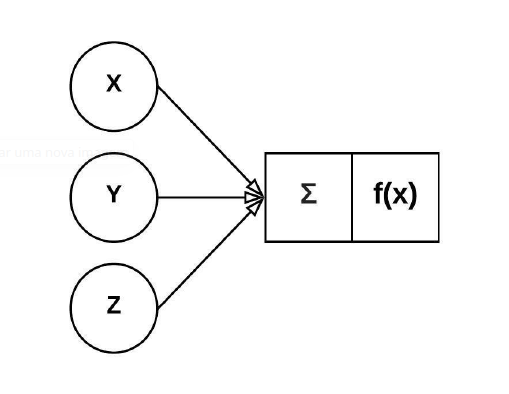

A partir deste modelo pode-se resolver de forma computacional os
chamados problemas linearmente separáveis. De forma bastante geral
pode-se entender tal conceito como o tipo de problema computacional onde
se resulta apenas um valor a ser usado para uma tomada de decisão. A partir desse modelo cria-se uma pequena rede neural que pode processar dados para que se ative ou não um neurônio, podemos abstrair essa condição também como se faz com operadores lógicos, onde uma tomada de decisão resultava em $0$ ou $1$, `True` ou `False`, `return x` ou `return y`, etc. Tomadas de decisão onde o que importa é uma opção ou outra.

Partindo para prática, agora atribuindo valores e funções para essa
estrutura, pode-se finalmente começar a entender de forma objetiva o
processamento da mesma:

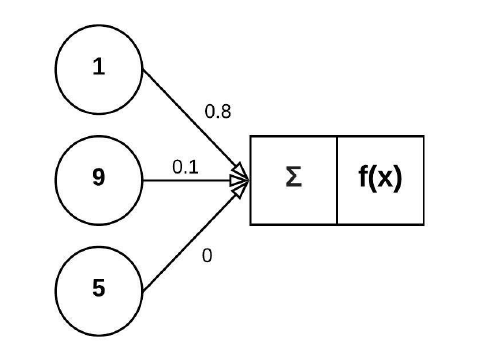



In [ ]:
#Atribuiç~ao das entradas e pesos

entradas = [1, 9, 5]
pesos = [0.8, 0.1, 0]


Em seguida teremos de executar uma simples função de soma entre
cada entrada e seu respectivo peso e posteriormente a soma dos valores
obtidos a partir deles.
Neste exemplo essa função se dará da seguinte forma:

Soma = $(1 * 0.8) + (9 * 0.1) + (5 * 0)$

Soma = $0.8 + 0.9 + 0$

Soma = $1.7$

In [ ]:
#implementaç~ao funç~ao de soma

def soma(e, p): #recebe entradas e pesos

  s = 0 #inicia a vari'avel s

  for i in range(3): #for do tamanho dos vetores de pesos e entradas

    s += e[i]*p[i] #multiplicar cada entrada por seu peso e somar

  return s

s = soma(entradas, pesos)

s

1.7000000000000002

Por fim a função de ativação neste caso, chamada de *Step Function*
(em tradução livre *Função Degrau*) possui uma regra bastante simples, se o
valor resultado da função de soma for $1$ ou maior que $1$, o neurônio será
ativado, se for uma valor abaixo de $1$ (mesmo aproximado, mas menor que $1$)
este neurônio em questão não será ativado.

Soma $\geq$ 1 (Ativação)

Soma < 1 (Não Ativação)

In [ ]:
#definiç~ao da funçao de ativaç~ao

def heaviside(s): #recebe o valor da soma

  if s >= 1: #verifica se 'e maior que 1

    return 1

  return 0

heaviside(s)

1

## Perceptron de Uma Camada – Tabela AND

Entendidos os conceitos lógicos de o que é um perceptron, como os mesmos são um modelo para geração de processamento de dados para por fim ser o parâmetro de uma função de ativação. Hora de, também de forma prática, entender de fato o que é aprendizagem de máquina.

Partindo para prática, ser'a criado do zero uma rede neural que aprenderá o que é o mecanismo lógico de uma tabela AND. Operador lógico muito usado em problemas que envolvem simples tomada de decisão. Inicialmente, como é de se esperar, 'e criada uma estrutura lógica que irá processar os valores mas de forma errada, sendo assim, na chamada fase supervisionada, ser'a treinada a rede para que ela aprenda o padrão
referencial correto e de fato solucione o que é o processamento das entradas e
as respectivas saídas de uma tabela AND.


| X1 | X2 | Sa'ida |
| -- | -- | -- |
| 0 | 0  |  0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |


Dessa forma, ser~ao necess'arios 4 operadores a primeira coluna, mais 4
operadores na segunda camada e na última coluna os resultados das relações
entre os mesmos. Logo, ser'a suficiente para criar um modelo de rede
neural que aprenderá essa lógica.


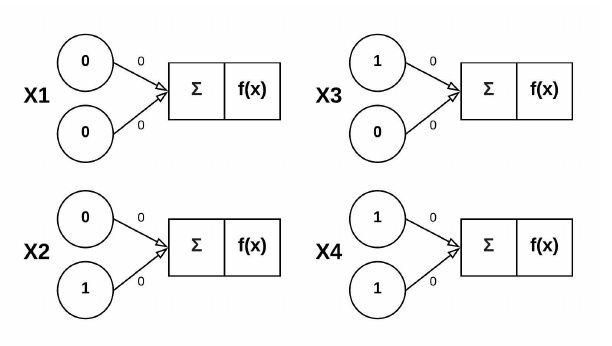


Montada a estrutura visual dos perceptrons, por hora, apenas para
fins didáticos, hora de realizar as devidas operações de multiplicação entre os valores de entrada e seus respectivos pesos. Novamente, vale salientar que neste caso em particular, para fins de aprendizado, estamos iniciando essas operações com pesos zerados e definidos manualmente.

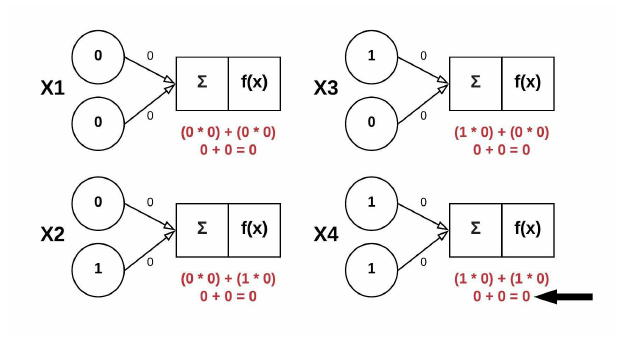

Em $X4$ a multiplicação das entradas pelos respectivos pesos como manda a regra resultou em $0$, mas de acordo com a tabela verdade este resultado deveria ser 1. Isso se deu porque
simplesmente os pesos 0 implicaram em uma multiplicação falha, qualquer
valor multiplicado por 0 resulta em 0.
`E preciso então treinar a rede para que ao final do processo se chegue ao valor esperado $(X4 = 1)$. Em redes neurais básicas como estas, ser'a feito o simples reajuste dos valores dos pesos e a repetição do processo para ver se o mesmo é corrigido.

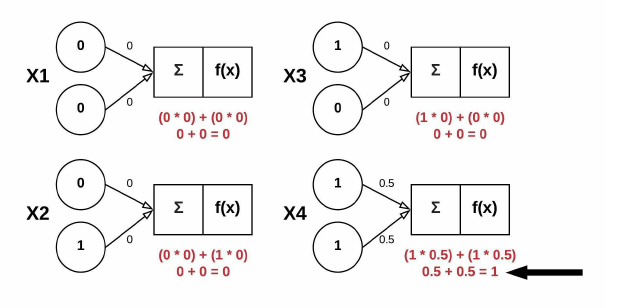

Revisando apenas o perceptron $4$, alterando os valores dos pesos
de $0$ para $0.5$ e repetindo a função de soma, agora sim temos o valor esperado $1$ (Tabela AND 1 e 1 = 1).
Uma vez encontrado o valor de pesos que solucionou o problema a nível de $X4$, hora de aplicar este mesmo valor de pesos a toda rede neural e verificar se este valor funciona para tudo.

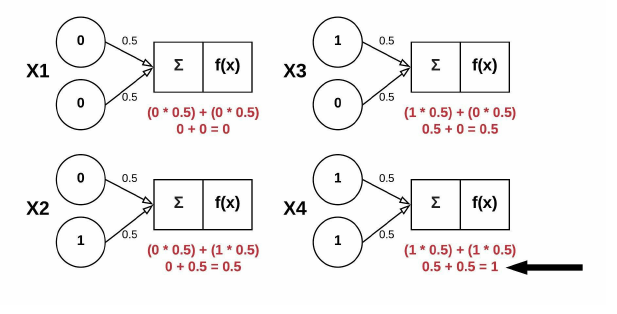

Aplicando o valor de peso $0.5$ a todos neurônios e refeitos os devidos cálculos dentro de nossa função soma, finalmente temos os valores corrigidos. Agora seguindo a lógica explicada anteriormente, como os valores de $X2$ e $X3$ são menores que $1$, na *step function* os mesmos serão reduzidos a
$0$, sendo apenas $X4$ o perceptron ativado nessa rede o que era esperado de
acordo com a tabela AND.

In [8]:
#c'odigo perceptron de uma camada da tabela AND

import numpy as np #importar bibliotecas necess'arias


entradas = np.array([[0,0],[0,1],[1,0],[1,1]]) #entradas dos valores l'ogicos poss'iveis
saidas = np.array([0,0,0,1]) #sa'ida esperada da tabela AND
pesos = np.array([0.0,0.0]) #pesos iniciais

taxaAprendizado = 0.5 #taxa de atualizaç~ao dos pesos a cada iteraç~ao

def Soma(e, p): #funç~ao que multiplica as entradas pelos pesos e as soma
  return e.dot(p)

s = Soma(entradas, pesos) #atribuir a s a soma das entradas vezes pesos

def stepFunction(s): #funç~ao que determina ativaç~ao do perceptron

  if s >= 1: #se for maior que 1 ativa

    return 1

  return 0 #caso contr'ario n~ao ativa

def calculoSaida(reg): #funç~ao para ap'os a multiplicaç~ao dos pesos saber quais perceptrons ativam

  s = reg.dot(pesos) #multiplica pelos pesos

  return stepFunction(s) #retorna a ativaç~ao

def aprendeAtualiza(): #funç~ao principal para aprendizado

  erroTotal = 1 #definir erro como 1 para entrar no while

  while erroTotal != 0: #repetir o processo at'e n~ao haver mais erros

    erroTotal = 0 #defirnir erro como zero para iniciar a contagem de erros

    for i in range(len(saidas)): #calcular para cada sa'ida

      calcSaida = calculoSaida(np.array(entradas[i])) #atribuir a primeira saida

      erro = abs(saidas[i]-calcSaida) #calcular o erro comparado com as sa'idas dadas

      erroTotal += erro #somar cada erro de cada sa'ida

      for j in range(len(pesos)): #atualizar o valor de cada peso

        pesos[j] = pesos[j] + (taxaAprendizado * entradas[i][j] * erro) #atualizar de acordo com o erro e taxa de aprendizado

        print('Pesos Atualizados:', str(pesos[j])) #mostrar os pesos

    print('Total de Erros:', str(erroTotal)) #mostrar o erro total


In [9]:
aprendeAtualiza()

Pesos Atualizados: 0.0
Pesos Atualizados: 0.0
Pesos Atualizados: 0.0
Pesos Atualizados: 0.0
Pesos Atualizados: 0.0
Pesos Atualizados: 0.0
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Total de Erros: 1
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Total de Erros: 0
